
本人主要方向是深度学习技术在媒体、量化交易上的应用，欢迎深度学习赛道上的新老司机们关注交流。以后还会为大家分享更多有趣的项目。

【下面是我的主页链接】

来AI Studio互粉吧~等你哦~ [https://aistudio.baidu.com/aistudio/personalcenter/thirdview/76563](https://aistudio.baidu.com/aistudio/personalcenter/thirdview/76563)

【项目列表】

[一文帮你理解用Paddle训练模型的原理1-手写回归模型 (https://aistudio.baidu.com/aistudio/projectdetail/367090)](https://aistudio.baidu.com/aistudio/projectdetail/367090)

[一文帮你理解用Paddle训练模型的原理2-权值可视化（VisualDL） (https://aistudio.baidu.com/aistudio/projectdetail/386954)](https://aistudio.baidu.com/aistudio/projectdetail/386954)

[训练数据太少？过拟合？一文带你领略“数据增长魔法”(上) (https://aistudio.baidu.com/aistudio/projectdetail/408059)](https://aistudio.baidu.com/aistudio/projectdetail/408059)

[训练数据太少？过拟合？一文带你领略“数据增长魔法”(下) (https://aistudio.baidu.com/aistudio/projectdetail/422256)](https://aistudio.baidu.com/aistudio/projectdetail/422256)



# 引言：为什么用图像数据増广（涨点呗）
有人云：“一入AI深似海，深度学习出不来”。在玩耍各种令人“眼花缭乱”的奇妙模型模型时，可能不少小伙伴（包括我）就像还没当上齐天大圣的孙悟空一样，喜不自胜，以为有了这些耍模型本事就“可得长生了”。其实，深度学习是一门数据科学。要想练出“得永生的仙丹”除了熟稔那些数学的“奇技淫巧”（和信各种“哥”之外），大量的标注数据是必不可少的。往往，决定一个实际AI项目效果的不是技术，而是是否拥有足量完备的数据。如今，各大公司毫不吝啬的将最新的机器学习算法和软件包免费提供给用户，其原因在于如今算法领域的入门门槛并不高。稀缺的资源并不是算法、编程框架和机器学习包，而是高质量的数据。既然，数据这么重要、获得成本又高。那么，有什么不花钱还能充分发掘现有数据潜力的好办法么？数据増广就是解决这一问题的“数据炼金”妙方。

还记得第一次在小白培训课上，我美滋滋写了个新鲜热乎儿的图片分类模型，然后，吃着火锅儿唱着歌，等模型跑出老师ppt上的完美曲线。结果，验证集的loss突然就“飞”上天了，就像下图这样。

![](https://ai-studio-static-online.cdn.bcebos.com/89025d978c9c450183a1e6795725e910202641d749ae40ee89546dc4f031eb0b)

问群里小伙伴得知，这模型十有八九是“过拟合”了,学了好多不该学的东西（无关特征），该学的却没学会，得治。群里寻得了不少药方——有添加L2正则化项(L2 Regulation)、每层随机Dropout神经元（Dropout Regulation）、进行数据増广（Data Augmentation）、甚至直接降低模型广度和深度。这些药方都能治疗这种loss曲线“大劈叉”。今天，就给小伙伴们先介绍一下其中的图像数据増广这味药方，其好处是很明显的——价格便宜（数学公式可以先放一边，上操作先）量又足（花样手段多）。增加数据量本身就能够提升模型的精度和抑制过拟合的发生，尤其在数据量不大的情况下。但是现实条件下往往因为成本等原因无法增加训练的数据样本。所以，我们采用数据増广技术以达到“扩大”样本量的效果。

# 一、如何进行数据増广
数据増广（Data Augmentation）也称数据增强，百度百科上的定义是：数据集增强主要是为了减少网络的过拟合现象，通过对训练图片进行变换可以得到泛化能力更强的网络，更好的适应应用场景。

数增强有线下增强（offline augmentation）和线上增强（online augmentation）两种方式。线下增强事先在数据集上执行所有转换，完成后会增加数据集的大小，比较适用于较小的数据集；线上增强是在读取数据后在内存中进行转换，便于处理大规模的数据集。当然这依赖于强大的GPU处理能力。我们这里用的就是线上增强方式，不能辜负了AI Studio给用的Tasla 100不是，哇哈哈哈。

本项目里介绍的这些数据増广手段一句话说就是用尽各种图像处理方法对数据集进行“蹂躏”，手段包括但不限于拉伸、旋转、翻转、裁切、填充、遮挡、变色、变对比度、加噪声等，使模型在更复杂、更丰富的条件下学习到数据集的更多“本质特征”，而忽略“无关特征”，以使模型获得更好的泛化性能，也就是抑制了过拟合现象。服用了数据増广药方的模型就像有了火眼金睛，目标“穿不穿马甲”都能认出来，而不是像聪明反被聪明误的过拟合模型那样靠衣冠识人。

下面我们就运行代码，看看图像应用各种图像増广方法后的效果吧。

In [ ]:
# 解压数据集（项目准备工作）
# 初次运行时需要将下面一行注释取消
!unzip -d /home/aistudio/work /home/aistudio/data/data22612/Images.zip

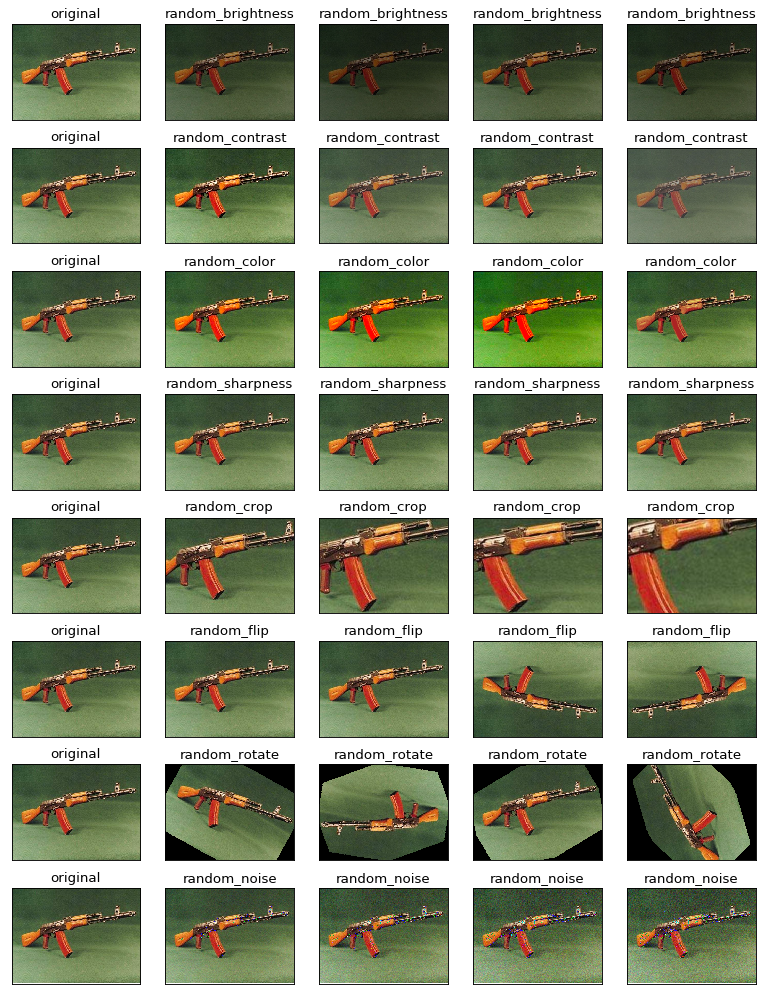

In [1]:
import numpy as np
import random
from PIL import Image, ImageEnhance
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# 随机改变亮度
def random_brightness(img, lower=0.5, upper=1.5):
    e = np.random.uniform(lower, upper)
    return ImageEnhance.Brightness(img).enhance(e)

# 随机改变对比度
def random_contrast(img, lower=0.5, upper=1.5):
    e = np.random.uniform(lower, upper)
    return ImageEnhance.Contrast(img).enhance(e)

# 随机改变颜色(饱和度)
def random_color(img, lower=0.5, upper=1.5):
    e = np.random.uniform(lower, upper)
    return ImageEnhance.Color(img).enhance(e)

# 随机改变清晰度
def random_sharpness(img, lower=0.5, upper=1.5):
    e = np.random.uniform(lower, upper)
    return ImageEnhance.Sharpness(img).enhance(e)

# 等比例随机裁剪
def random_crop(img, max_ratio=1.5):
    #if(random.random() > 0.5):
    #    return img
    img = np.asarray(img)
    h, w, _ = img.shape
    m = random.uniform(1, max_ratio)
    n = random.uniform(1, max_ratio)
    x1 = w * (1 - 1 / m) / 2
    y1 = h * (1 - 1 / n) / 2
    x2 = x1 + w * 1 / m
    y2 = y1 + h * 1 / n
    img = Image.fromarray(img)
    img = img.crop([x1, y1, x2, y2])
    type = [Image.NEAREST,Image.BILINEAR,Image.BICUBIC,Image.ANTIALIAS]
    img = img.resize((w, h),type[random.randint(0,3)])
    return img

# 随机翻转
def random_flip(img, thresh=0.5):
    img = np.asarray(img)
    if random.random() > thresh:
        img = img[:, ::-1, :]
    if random.random() > thresh:
        img = img[::-1 , :, :]
    img = Image.fromarray(img)
    return img

# 随机旋转图像
def random_rotate(img, thresh=0.5):
    # 任意角度旋转
    angle = np.random.randint(0, 360)
    img = img.rotate(angle)
    '''
    # 0, 90, 270, 360度旋转
    img = np.asarray(img)
    if random.random() > thresh:
        img = img[:, ::-1, :]
    if random.random() > thresh:
        img = img[::-1 , :, :]
    img = Image.fromarray(img)
    '''
    return img

# 随机加高斯噪声
def random_noise(img, max_sigma = 10):
    img = np.asarray(img)
    sigma = np.random.uniform(0, max_sigma)
    noise = np.round(np.random.randn(img.shape[0], img.shape[1], 3) * sigma).astype('uint8')
    img = img + noise
    img[img > 255] = 255
    img[img < 0] = 0
    img = Image.fromarray(img)
    return img

#统一使用各种图像増广方法
def image_augment(img):
    ops = [random_brightness, random_contrast, random_color, random_sharpness, random_crop, \
            random_flip, random_rotate, random_noise]
    np.random.shuffle(ops)

    img = Image.fromarray(img)
    img = ops[0](img)
    img = ops[1](img)
    img = ops[2](img)
    img = ops[3](img)
    img = ops[4](img)
    img = ops[5](img)
    img = ops[6](img)
    img = ops[7](img)
    img = np.asarray(img)

    return img

#逐一测试各种图像数据増广效果
ops = [random_brightness, random_contrast, random_color, random_sharpness, random_crop, \
        random_flip, random_rotate, random_noise]
ops_title = ['random_brightness', 'random_contrast', 'random_color', 'random_sharpness', 'random_crop', \
        'random_flip', 'random_rotate', 'random_noise']
plt.figure(figsize=(12,16),dpi=80)
for i in range(len(ops)):
    img = cv2.imread("/home/aistudio/work/Images/ak47/001_0086.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    demo_num = 4
    #print(i + 1, 1, i * (demo_num + 1) + 1)
    plt.subplot(len(ops), demo_num + 1, i * (demo_num + 1) + 1)
    plt.imshow(img)
    plt.title('original')
    plt.xticks([])
    plt.yticks([])
    for j in range(demo_num):
        #print(i + 1, j + 2, i * (demo_num + 1) + j + 2)
        plt.subplot(len(ops), demo_num + 1, i * (demo_num + 1) + j + 2)
        img = Image.fromarray(img)
        img = ops[i](img)
        img = np.asarray(img)
        plt.imshow(img)
        plt.title(ops_title[i])
        plt.xticks([])
        plt.yticks([])


上面我们分别用Image库和CV库实现明暗、对比度、饱和度、锐化、 裁切、翻转、旋转、和加噪的效果。

下面我们看看随机叠加上面所有图像増广的效果。

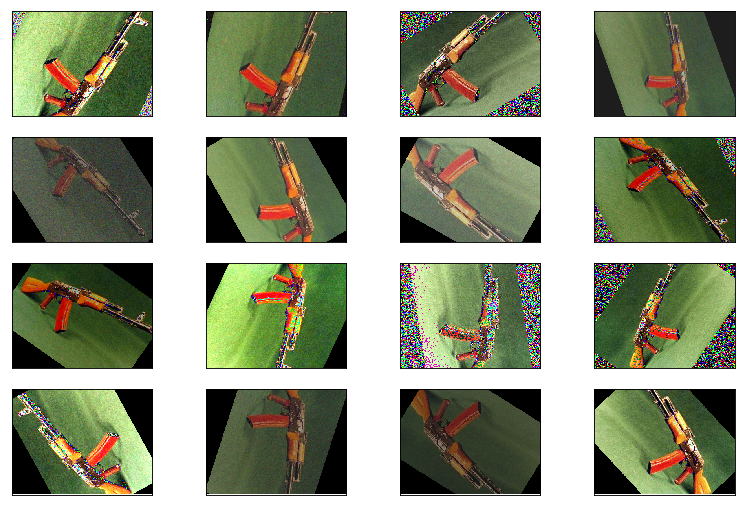

In [2]:
img = cv2.imread("/home/aistudio/work/Images/ak47/001_0086.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,8),dpi=80)
for i in range(16):
    plt.subplot(4,4,i + 1)
    plt.imshow(image_augment(img))
    plt.xticks([])
    plt.yticks([])


# 二、数据増广之鸟枪换炮（imgaug库使用介绍）

毕老师曾经曰过：站在巨人的肩膀上，不但能看得更远，还能嘲笑矮子（梗的出处自行去“[百度构架师手把手教深度学习](https://aistudio.baidu.com/aistudio/education/group/info/888)”课程中毕然老师讲NLP那节课查）。所以,有肩膀就要靠，有现成的库就要调。而且，自己写图像増广处理函数“多累”。

当当当当...偷懒神器 **imgaug** 库来喽！（详细信息参考[https://imgaug.readthedocs.io/en/latest/index.html](https://imgaug.readthedocs.io/en/latest/index.html)）

先用下面的代码在AI Studio上装好imgaug库吧(注意装完使用时要引入包的安装路径)。

In [3]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, you need to use the persistence path as the following:
# 初次运行时需要将下面两行注释取消
#!mkdir /home/aistudio/external-libraries
#!pip install imgaug -t /home/aistudio/external-libraries

# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可:
# Also add the following code, so that every time the environment (kernel) starts, just run the following code:
import sys
sys.path.append('/home/aistudio/external-libraries')

使用非常简单，三行代码敲定。
```
from imgaug import augmenters as iaa # 一句导入。
seq = iaa.Sequential([iaa.Crop(px=(0, 50))]) # 一句定义使用増广处理的序列，可同时定义多个。
img = seq(images=img) # 然后就可以当普通函数使用了。
```
***注意：文档里介绍，img既可以是一个形状为 [H,W,C] 的存储一张图片的三维数组，也可以是一个形状为 [B,H,W,C] 的存储了一个batch_size数量的图片的4维数组。但是我测试使用 [H,W,C] 形状的参数时，图像处理的效果是乱的。所以即使只处理一张图片，我用的输入也是 [1,H,W,C] 形状的。***

下面是鸟枪换步枪的效果，射速提高哦。

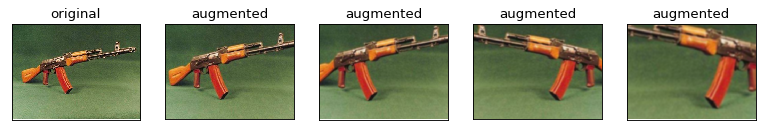

In [4]:
from imgaug import augmenters as iaa
import matplotlib.pyplot as plt

# 定义图片増广处理序列
seq = iaa.Sequential([
    iaa.Crop(px=(0, 50)), # (四周0到50像素随机裁剪)crop images from each side by 0 to 50px (randomly chosen)
    iaa.Fliplr(0.5), # （50%概率水平翻转）horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)) # （高斯模糊sigma=（0到3.0））blur images with a sigma of 0 to 3.0
])

img = cv2.imread("/home/aistudio/work/Images/ak47/001_0086.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,8),dpi=80)
plt.subplot(1, 5, 1)
plt.imshow(img)
plt.title('original')
plt.xticks([])
plt.yticks([])
for i in range(2, 6):
    plt.subplot(1, 5, i)
    img = np.array([img])
    img = seq(images=img)
    img = img[0]
    plt.imshow(img)
    plt.title('augmented')
    plt.xticks([])
    plt.yticks([])


再看看换成机关炮的效果：（能大幅提高分类任务精度）

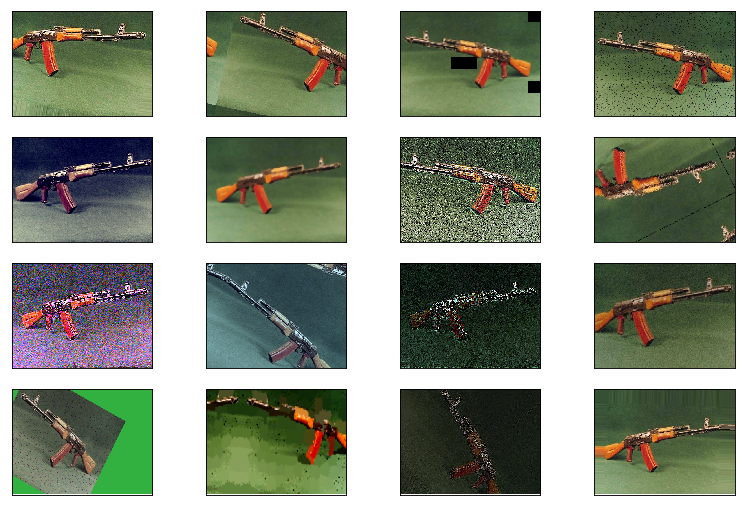

In [5]:
import imgaug as ia
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt

def image_augment_imgauglib(img):
    img = np.array([img])
    ia.seed(random.randint(0, 10000))

    # Example batch of images.
    # The array has shape (N, W, H, C) and dtype uint8.
    # Sometimes(0.5, ...) applies the given augmenter in 50% of all cases,
    # e.g. Sometimes(0.5, GaussianBlur(0.3)) would blur roughly every second
    # image.
    sometimes = lambda aug: iaa.Sometimes(0.5, aug)
    
    # Define our sequence of augmentation steps that will be applied to every image.
    seq = iaa.Sequential(
        [
            #
            # Apply the following augmenters to most images.
            #
            iaa.Fliplr(0.5), # horizontally flip 50% of all images
            iaa.Flipud(0.2), # vertically flip 20% of all images
    
            # crop some of the images by 0-10% of their height/width
            sometimes(iaa.Crop(percent=(0, 0.1))),
    
            # Apply affine transformations to some of the images
            # - scale to 80-120% of image height/width (each axis independently)
            # - translate by -20 to +20 relative to height/width (per axis)
            # - rotate by -45 to +45 degrees
            # - shear by -16 to +16 degrees
            # - order: use nearest neighbour or bilinear interpolation (fast)
            # - mode: use any available mode to fill newly created pixels
            #         see API or scikit-image for which modes are available
            # - cval: if the mode is constant, then use a random brightness
            #         for the newly created pixels (e.g. sometimes black,
            #         sometimes white)
            sometimes(iaa.Affine(
                scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
                translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
                rotate=(-45, 45),
                shear=(-16, 16),
                order=[0, 1],
                cval=(0, 255),
                mode=ia.ALL
            )),
    
            #
            # Execute 0 to 5 of the following (less important) augmenters per
            # image. Don't execute all of them, as that would often be way too
            # strong.
            #
            iaa.SomeOf((0, 5),
                [
                    # Convert some images into their superpixel representation,
                    # sample between 20 and 200 superpixels per image, but do
                    # not replace all superpixels with their average, only
                    # some of them (p_replace).
                    sometimes(
                        iaa.Superpixels(
                            p_replace=(0, 1.0),
                            n_segments=(20, 200)
                        )
                    ),
    
                    # Blur each image with varying strength using
                    # gaussian blur (sigma between 0 and 3.0),
                    # average/uniform blur (kernel size between 2x2 and 7x7)
                    # median blur (kernel size between 3x3 and 11x11).
                    iaa.OneOf([
                        iaa.GaussianBlur((0, 3.0)),
                        iaa.AverageBlur(k=(2, 7)),
                        iaa.MedianBlur(k=(3, 11)),
                    ]),
    
                    # Sharpen each image, overlay the result with the original
                    # image using an alpha between 0 (no sharpening) and 1
                    # (full sharpening effect).
                    iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)),
    
                    # Same as sharpen, but for an embossing effect.
                    iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)),
    
                    # Search in some images either for all edges or for
                    # directed edges. These edges are then marked in a black
                    # and white image and overlayed with the original image
                    # using an alpha of 0 to 0.7.
                    sometimes(iaa.OneOf([
                        iaa.EdgeDetect(alpha=(0, 0.7)),
                        iaa.DirectedEdgeDetect(
                            alpha=(0, 0.7), direction=(0.0, 1.0)
                        ),
                    ])),
    
                    # Add gaussian noise to some images.
                    # In 50% of these cases, the noise is randomly sampled per
                    # channel and pixel.
                    # In the other 50% of all cases it is sampled once per
                    # pixel (i.e. brightness change).
                    iaa.AdditiveGaussianNoise(
                        loc=0, scale=(0.0, 0.05*255), per_channel=0.5
                    ),
    
                    # Either drop randomly 1 to 10% of all pixels (i.e. set
                    # them to black) or drop them on an image with 2-5% percent
                    # of the original size, leading to large dropped
                    # rectangles.
                    iaa.OneOf([
                        iaa.Dropout((0.01, 0.1), per_channel=0.5),
                        iaa.CoarseDropout(
                            (0.03, 0.15), size_percent=(0.02, 0.05),
                            per_channel=0.2
                        ),
                    ]),
    
                    # Invert each image's channel with 5% probability.
                    # This sets each pixel value v to 255-v.
                    iaa.Invert(0.05, per_channel=True), # invert color channels
    
                    # Add a value of -10 to 10 to each pixel.
                    iaa.Add((-10, 10), per_channel=0.5),
    
                    # Change brightness of images (50-150% of original value).
                    iaa.Multiply((0.5, 1.5), per_channel=0.5),
    
                    # Improve or worsen the contrast of images.
                    iaa.LinearContrast((0.5, 2.0), per_channel=0.5),
    
                    # Convert each image to grayscale and then overlay the
                    # result with the original with random alpha. I.e. remove
                    # colors with varying strengths.
                    iaa.Grayscale(alpha=(0.0, 1.0)),
    
                    # In some images move pixels locally around (with random
                    # strengths).
                    sometimes(
                        iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)
                    ),
    
                    # In some images distort local areas with varying strength.
                    sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05)))
                ],
                # do all of the above augmentations in random order
                random_order=True
            )
        ],
        # do all of the above augmentations in random order
        random_order=True
    )
    img = seq(images=img)
    img = img[0]
    return img
   

img = cv2.imread("/home/aistudio/work/Images/ak47/001_0086.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,8),dpi=80)
for i in range(16):
    plt.subplot(4,4,i + 1)
    plt.imshow(image_augment_imgauglib(img))
    plt.xticks([])
    plt.yticks([])


下面这个则是“东北乱炖”的效果（叠加了本项目中用到的所有数据増广手段），试试看吃药治（loss曲线）劈叉是否“多多益善”。

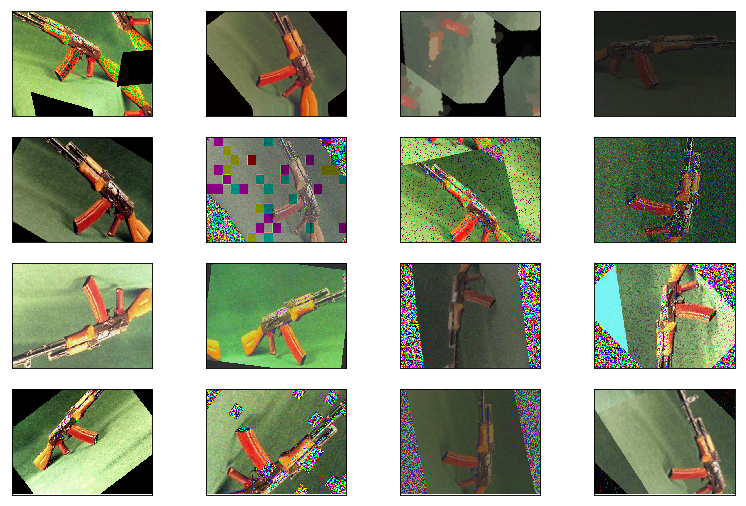

In [6]:
img = cv2.imread("/home/aistudio/work/Images/ak47/001_0086.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,8),dpi=80)
for i in range(16):
    plt.subplot(4,4,i + 1)
    if i < 8:
        plt.imshow(image_augment_imgauglib(image_augment(img))) # 先image_augment后image_augment_imgauglib
    else:
        plt.imshow(image_augment(image_augment_imgauglib(img))) # 先image_augment_imgauglib后image_augment
    plt.xticks([])
    plt.yticks([])

# 三、看看“涨了多少点”（分类任务演示数据増广效果）
好，下面我们就用一个完整的分类任务看看，在“没有使用图像数据増广”、“使用简单的数据増广（手写代码）”和“使用imgaug库进行数据増广”这三种条件下，模型训练时loss和acc（准确率）的变化趋势。本例中使用VGG网络演示分类任务。

In [ ]:
import numpy as np
import paddle
import paddle.fluid as fluid
from paddle.fluid.layer_helper import LayerHelper
from paddle.fluid.dygraph.nn import Conv2D, Pool2D, BatchNorm, FC
from paddle.fluid.dygraph.base import to_variable

# 数据读取
def normalize_img(img, augment=''): # 图片数据归一化
    # 将图片尺寸缩放道 224x224
    img = cv2.resize(img, (224, 224))
    if augment == 'userDef': # 使用自定义数据増广
        img = image_augment(img)
    elif augment == 'imgaugLib':  # 使用imgaug库进行数据増广
        img = image_augment_imgauglib(img)
    elif augment == 'allab':  # 使用两种方式叠加进行数据増广(先userDef后imgaugLib)
        img = image_augment_imgauglib(image_augment(img))
    elif augment == 'allba':  # 使用两种方式叠加进行数据増广(先imgaugLib后userDef)
        img = image_augment(image_augment_imgauglib(img))
    #plt.imshow(img)
    # 读入的图像数据格式是[H, W, C]。使用转置操作将其变成[C, H, W], 以适应Paddle的卷积操作对数据格式的要求
    img = np.transpose(img, (2,0,1))
    img = img.astype('float32')
    # 将数据范围调整到[-1.0, 1.0]之间
    img = img / 255.
    img = img * 2.0 - 1.0
    #img = np.mean(img, axis = 0).reshape((1, 28, 28))
    return img

def data_reader(mode='train', batch_size=8, augment=''): #定义读取器
    # 将datadir目录下的文件列出来，每条文件都要读入
    if(mode == 'train'):
        fileNames = np.loadtxt("./data/data22612/Train.txt", dtype=np.str)
        np.random.shuffle(fileNames) #只有训练集做shuffle
    elif(mode == 'validation'):
        fileNames = np.loadtxt("./data/data22612/Eval.txt", dtype=np.str)
    def reader():
        batch_imgs = []
        batch_labels = []
        for name in fileNames:
            img = cv2.imread("./work/Images/"+name[0])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            if(mode == 'train'):
                img = normalize_img(img, augment) #训练集使用图像増广
            elif(mode == 'validation'):
                img = normalize_img(img) #验证集不使用图像増广
            label = name[1]
            batch_imgs.append(img)
            batch_labels.append(label)
            if len(batch_imgs) == batch_size:
                imgs_array = np.array(batch_imgs).astype('float32')
                labels_array = np.array(batch_labels).astype('int64').reshape(-1, 1)
                yield imgs_array, labels_array
                batch_imgs = []
                batch_labels = []
        if len(batch_imgs) > 0:
            imgs_array = np.array(batch_imgs).astype('float32')
            labels_array = np.array(batch_labels).astype('int64').reshape(-1, 1)
            yield imgs_array, labels_array
    return reader

# 定义VGG模型（简单好用，便于初学者理解）
# 定义vgg块，包含多层卷积和1层2x2的最大池化层
class vgg_block(fluid.dygraph.Layer):
    def __init__(self, name_scope, num_convs, num_channels):
        """
        num_convs, 卷积层的数目
        num_channels, 卷积层的输出通道数，在同一个Incepition块内，卷积层输出通道数是一样的
        """
        super(vgg_block, self).__init__(name_scope)
        self.conv_list = []
        for i in range(num_convs):
            conv_layer = self.add_sublayer('conv_' + str(i), Conv2D(self.full_name(), 
                                        num_filters=num_channels, filter_size=3, padding=1, act='relu'))
            self.conv_list.append(conv_layer)
        self.pool = Pool2D(self.full_name(), pool_stride=2, pool_size = 2, pool_type='max')
    def forward(self, x):
        for item in self.conv_list:
            x = item(x)
        return self.pool(x)

class VGG(fluid.dygraph.Layer):
    def __init__(self, name_scope, conv_arch=((2, 64), 
                                (2, 128), (3, 256), (3, 512), (3, 512)), num_classes=1):
        super(VGG, self).__init__(name_scope)
        self.vgg_blocks=[]
        iter_id = 0
        # 添加vgg_block
        # 这里一共5个vgg_block，每个block里面的卷积层数目和输出通道数由conv_arch指定
        for (num_convs, num_channels) in conv_arch:
            block = self.add_sublayer('block_' + str(iter_id), 
                    vgg_block(self.full_name(), num_convs, num_channels))
            self.vgg_blocks.append(block)
            iter_id += 1
        self.fc1 = FC(self.full_name(),
                      size=4096,
                      act='relu')
        self.drop1_ratio = 0.5
        self.fc2= FC(self.full_name(),
                      size=4096,
                      act='relu')
        self.drop2_ratio = 0.5
        self.fc3 = FC(self.full_name(),
                      size=num_classes,
                      )
    def forward(self, x):
        for item in self.vgg_blocks:
            x = item(x)
        x = fluid.layers.dropout(self.fc1(x), self.drop1_ratio)
        x = fluid.layers.dropout(self.fc2(x), self.drop2_ratio)
        x = self.fc3(x)
        return x

# 模型训练
# 定义训练过程
def train(model, augment=''):
    with fluid.dygraph.guard():
        print('start training ... ')
        model.train()
        epoch_num = 100
        BATCH_SIZE = 8
        opt = fluid.optimizer.AdamOptimizer(learning_rate=0.0001)
        train_loader = data_reader(mode='train', batch_size=BATCH_SIZE, augment=augment)
        valid_loader = data_reader(mode='validation', batch_size=BATCH_SIZE, augment=augment)
        lossTrain, accTrain, lossEval, accEval = [], [], [], []
        bestPrecise = 0
        for epoch in range(epoch_num):
            lossEpochMean = 0
            accEpochMean = 0
            for batch_id, data in enumerate(train_loader()):
                x_data, y_data = data
                # 将numpy.ndarray转化成Tensor
                img = fluid.dygraph.to_variable(x_data)
                label = fluid.dygraph.to_variable(y_data)
                # 计算模型输出
                logits = model(img)
                pred = fluid.layers.softmax(logits)
                #print(label.numpy().T)
                # 计算损失函数
                loss = fluid.layers.softmax_with_cross_entropy(logits, label)
                avg_loss = fluid.layers.mean(loss)
                lossEpochMean += avg_loss.numpy()[0]
                acc = fluid.layers.accuracy(pred, label)
                accEpochMean += acc.numpy()[0]
                avg_loss.backward()
                opt.minimize(avg_loss)
                model.clear_gradients()
            lossEpochMean = lossEpochMean / (batch_id+1)
            accEpochMean = accEpochMean / (batch_id+1)
            lossTrain.append(lossEpochMean)
            accTrain.append(accEpochMean)
            print("epoch: {}, loss is: {}, acc is: {}".format(epoch, [lossEpochMean], [accEpochMean]))
            
            model.eval()
            lossEpochMean2 = 0
            accEpochMean2 = 0
            for batch_id2, data2 in enumerate(valid_loader()):
                x_data2, y_data2 = data2
                # 将numpy.ndarray转化成Tensor
                img2 = fluid.dygraph.to_variable(x_data2)
                label2 = fluid.dygraph.to_variable(y_data2)
                # 计算模型输出
                logits2 = model(img2)
                pred2 = fluid.layers.softmax(logits2)
                #print(label2.numpy().T)
                # 计算损失函数
                loss2 = fluid.layers.softmax_with_cross_entropy(logits2, label2)
                avg_loss2 = fluid.layers.mean(loss2)
                lossEpochMean2 += avg_loss2.numpy()[0]
                acc2 = fluid.layers.accuracy(pred2, label2)
                accEpochMean2 += acc2.numpy()[0]
            lossEpochMean2 = lossEpochMean2 / (batch_id2+1)
            accEpochMean2 = accEpochMean2 / (batch_id2+1)
            lossEval.append(lossEpochMean2)
            accEval.append(accEpochMean2)
            print("[validation] loss/accuracy: {}/{}".format(lossEpochMean2, accEpochMean2))
            model.train()
        
        if augment == 'userDef': # 使用自定义数据増广
            graphSavePath = './logs/userDefAug_'
        elif augment == 'imgaugLib':  # 使用imgaug库进行数据増广
            graphSavePath = './logs/imgaugLibAug_'
        elif augment == 'allab':  # 使用imgaug库进行数据増广
            graphSavePath = './logs/allabAug_'
        elif augment == 'allba':  # 使用imgaug库进行数据増广
            graphSavePath = './logs/allbaAug_'
        else: #不使用数据増广
            graphSavePath = './logs/noAug_'
        np.save(graphSavePath+"lossTrain.npy", np.array(lossTrain))
        np.save(graphSavePath+"accTrain.npy", np.array(accTrain))
        np.save(graphSavePath+"lossEval.npy", np.array(lossEval))
        np.save(graphSavePath+"accEval.npy", np.array(accEval))
        #print(lossTrain, accTrain, lossEval, accEval)
        print('graphs saved...')
        print('end...')

if __name__ == '__main__':
    # 创建模型
    #model = LeNet("LeNet", num_classes=16)
    #model = AlexNet("AlexNet", num_classes=16)
    model = VGG("VGG", num_classes=16)
    #model = GoogLeNet("GoogLeNet", num_classes=16)
    #model = ResNet("ResNet", class_dim=16)
    #model = ResNet("ResNet", class_dim=16, layers=101)
    #model = ResNet("ResNet", class_dim=16, layers=152)
    #启动训练过程
    train(model) # 不使用数据増广的训练
    model = VGG("VGG", num_classes=16) # 重新初始化网络权重参数
    train(model, augment='userDef') # 使用自定义数据増广的训练
    model = VGG("VGG", num_classes=16)
    train(model, augment='imgaugLib') # 使用imgaug库进行数据増广的训练
    model = VGG("VGG", num_classes=16)
    train(model, augment='allab') # 使用两种方式进叠加行数据増广的训练(先userDef后imgaugLib)
    model = VGG("VGG", num_classes=16)
    train(model, augment='allba') # 使用两种方式叠加进行数据増广的训练(先imgaugLib后userDef)
    

训练完毕，下面看看刚才提到的三种条件下，模型训练过程中训练集（lossTrain）和验证集（lossEval）的线条表演吧。

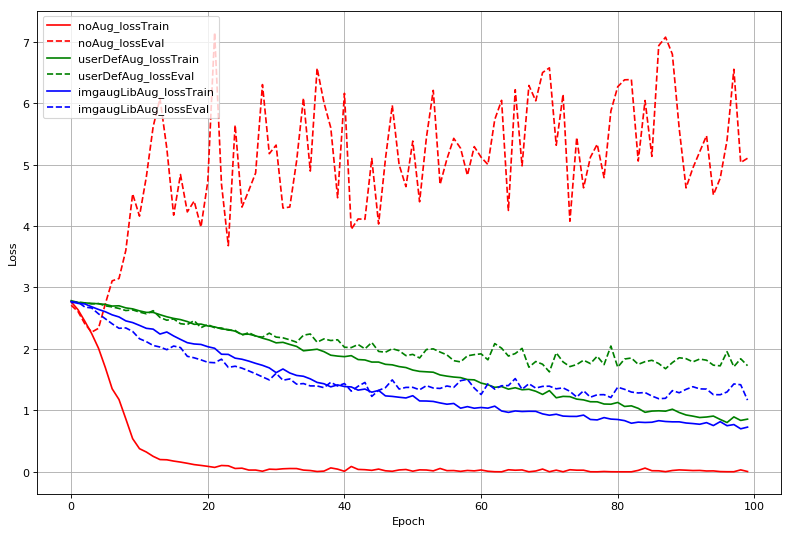

In [7]:
#查看训练结果(loss)
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
figurePath = "./logs/"
start = 0
end = -1
noAug_lossTrain = np.load(figurePath+"noAug_lossTrain.npy")[start:end]
noAug_lossEval = np.load(figurePath+"noAug_lossEval.npy")[start:end]
userDefAug_lossTrain = np.load(figurePath+"userDefAug_lossTrain.npy")[start:end]
userDefAug_lossEval = np.load(figurePath+"userDefAug_lossEval.npy")[start:end]
imgaugLibAug_lossTrain = np.load(figurePath+"imgaugLibAug_lossTrain.npy")[start:end]
imgaugLibAug_lossEval = np.load(figurePath+"imgaugLibAug_lossEval.npy")[start:end]
plt.figure(figsize=(12,8),dpi=80)
plt.plot(range(len(noAug_lossTrain)), noAug_lossTrain, 'r', label='noAug_lossTrain')
plt.plot(range(len(noAug_lossEval)), noAug_lossEval, 'r--', label='noAug_lossEval')
plt.plot(range(len(userDefAug_lossTrain)), userDefAug_lossTrain, 'g', label='userDefAug_lossTrain')
plt.plot(range(len(userDefAug_lossEval)), userDefAug_lossEval, 'g--', label='userDefAug_lossEval')
plt.plot(range(len(imgaugLibAug_lossTrain)), imgaugLibAug_lossTrain, 'b', label='imgaugLibAug_lossTrain')
plt.plot(range(len(imgaugLibAug_lossEval)), imgaugLibAug_lossEval, 'b--', label='imgaugLibAug_lossEval')
plt.legend(loc="upper left")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

哈哈，不用数据増广，模型的loss曲线果然上演“大劈叉”。上图中红色线条（实线为训练集，虚线为验证集）是没用数据増广时模型loss的变化曲线。从大概第6个eopoch开始，训练集loss（红实线）继续下降，而验证集loss（红虚线）开始“飞天表演”。这说明vgg模型的学习能力是很强的，几个回合就把训练数据学得明明白白，分（类）得清清楚楚。但一到训练集上跑预测，就错得一塌糊涂。也就是说模型训练时在不用数据増广的条件下出现了过拟合现象，没有学到足够正确的、泛化性能良好的分类特征。

图中绿线是应用了简单图像増广的效果，loss曲线下降是比较令人满意的。蓝色曲线是应用了imgaug库进行图像増广的效果，loss曲线下降得更快更低，说明其效果更好。

下面，我们看看acc（准确率）曲线在训练时的变化。

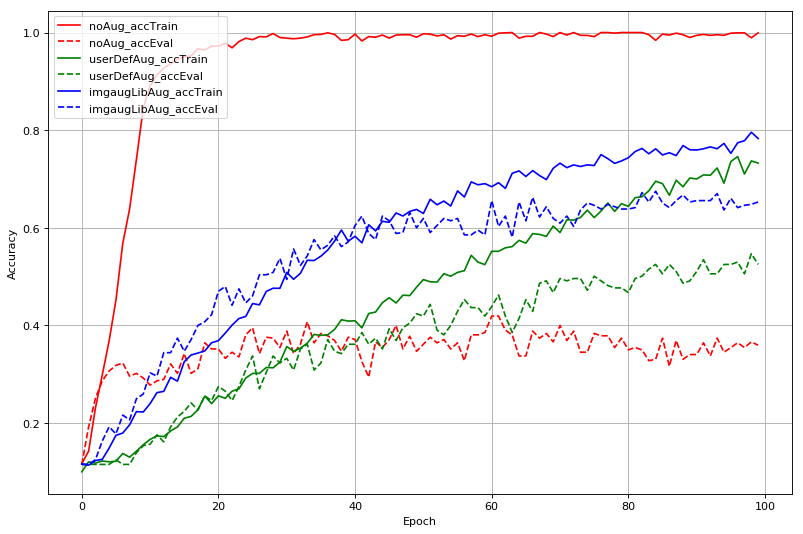

In [8]:
#查看训练结果(Accuracy)
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
figurePath = "./logs/"
start = 0
end = -1

noAug_accTrain = np.load(figurePath+"noAug_accTrain.npy")[start:end]
noAug_accEval = np.load(figurePath+"noAug_accEval.npy")[start:end]
userDefAug_accTrain = np.load(figurePath+"userDefAug_accTrain.npy")[start:end]
userDefAug_accEval = np.load(figurePath+"userDefAug_accEval.npy")[start:end]
imgaugLibAug_accTrain = np.load(figurePath+"imgaugLibAug_accTrain.npy")[start:end]
imgaugLibAug_accEval = np.load(figurePath+"imgaugLibAug_accEval.npy")[start:end]
plt.figure(figsize=(12,8),dpi=80)
plt.plot(range(len(noAug_accTrain)), noAug_accTrain, 'r', label='noAug_accTrain')
plt.plot(range(len(noAug_accEval)), noAug_accEval, 'r--', label='noAug_accEval')
plt.plot(range(len(userDefAug_accTrain)), userDefAug_accTrain, 'g', label='userDefAug_accTrain')
plt.plot(range(len(userDefAug_accEval)), userDefAug_accEval, 'g--', label='userDefAug_accEval')
plt.plot(range(len(imgaugLibAug_accTrain)), imgaugLibAug_accTrain, 'b', label='imgaugLibAug_accTrain')
plt.plot(range(len(imgaugLibAug_accEval)), imgaugLibAug_accEval, 'b--', label='imgaugLibAug_accEval')
plt.legend(loc="upper left")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

不用数据増广时（红色）：训练集（红实线）准确率30个epoch就升到了近乎100%，而验证集卡在了40%再也上不去。这么大的差距说明，和前面loss曲线反应的情况一样，模型出现了严重的过拟合。

使用简单数据増广时（绿色）：训练集与验证集的准确率一同上升，表现还不错。

使用imgaug库进行教完善的数据増广手段时（蓝色）：模型的分类准确率最佳。

模型训练100轮后的结果：

![](https://ai-studio-static-online.cdn.bcebos.com/2c9709f7f4404a3ea0f95b616fd186f7667bafa0d4dc42838467366c40798e1b)

我们从实验结果看到，模型由于使用了合理的数据増广技术，训练100个epoch时的分类准曲率从36%提高到了65.3%,将近调高了一倍。这说明使用数据増广确实能够提升模型的性能。

需要说明的是，这个项目的目的是为了展示数据増广的效果，模型只训练了100轮，训练得并不充分，而且模型也还有很大的改进空间（可以采用GoogleNet、ResNet、DenseNet等更高效的网络）。在模型其他方面都优化得比较完善\已经较高（达到90%以上）的情况下，采用数据増广手段仍然可以提升模型分类准确率1到2个点。这是很了不起的效果哦。

最后，再让我们看看，如果将本项目中展示的所有数据増广方法统统叠加在一起使用会发生什么：（严肃的知识前面已经说完，这里属于撒花了）

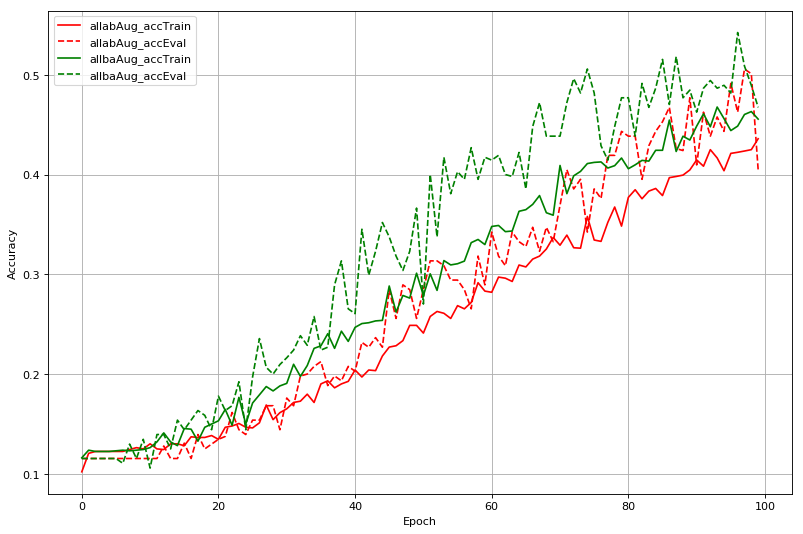

In [5]:
#查看叠加两种数据増广后的训练结果(Accuracy)
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
figurePath = "./logs/"
start = 0
end = -1

allabAug_accTrain = np.load(figurePath+"allabAug_accTrain.npy")[start:end]
allabAug_accEval = np.load(figurePath+"allabAug_accEval.npy")[start:end]
allbaAug_accTrain = np.load(figurePath+"allbaAug_accTrain.npy")[start:end]
allbaAug_accEval = np.load(figurePath+"allbaAug_accEval.npy")[start:end]
plt.figure(figsize=(12,8),dpi=80)
plt.plot(range(len(allabAug_accTrain)), allabAug_accTrain, 'r', label='allabAug_accTrain')
plt.plot(range(len(allabAug_accEval)), allabAug_accEval, 'r--', label='allabAug_accEval')
plt.plot(range(len(allbaAug_accTrain)), allbaAug_accTrain, 'g', label='allbaAug_accTrain')
plt.plot(range(len(allbaAug_accEval)), allbaAug_accEval, 'g--', label='allbaAug_accEval')
plt.legend(loc="upper left")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


上面这张图中，红线是模型先应用我们自己实现的“简单数据増广”，后应用imgaug库实现的数据増广的条件下，训练集和验证集的acc曲线。绿线是按照相反的顺序应用这两种数据増广的条件下，训练集和验证集的acc曲线。通过将这张图表和前一张acc曲线的图表结合在一起分析，我得出了以下认识：
1. 在同样的训练轮数下（本项目为100epoch），应用的数据増广方法越多，模型训练时准确率提升的越慢。
1. 以不同的顺序应用相同规模的数据増广方法，产生的效果是不同的。
1. 不应用数据増广时，模型训练时，训练集的准确率比验证集的上升的要快。而在应用数据増广训练时，由于验证集预测中不进行数据増广，所以验证集的准确率开始上升的比训练集还要快。个规律我们可以帮助我们推测当前模型训练得是否充分，准群率是否还有上升空间。

从上面的这张图来看，在应用了所有数据増广方法后，模型的准确率还可提升。我曾经实验训练到300epoch、500epoch仍是无法的出最后的结论。也就是是否数据増广用得越多越好。希望有小伙伴能比我得出更好的结论，也希望更有经验的大佬不吝指点。
实际上，除了实验尝试，现在也有了利用深度学习寻解最优图像増广策略的技术，有兴趣的小伙伴可以更深入的了解一下。

感谢大家一直读到这里。本来我还想在项目里加SamplePairing、Mixup等内容...下个项目继续吧。

**【训练数据太少？过拟合？一文带你领略“数据增长魔法”(下)已更新】**

[训练数据太少？过拟合？一文带你领略“数据增长魔法”(下) (https://aistudio.baidu.com/aistudio/projectdetail/422256)](https://aistudio.baidu.com/aistudio/projectdetail/422256)


本人主要方向是深度学习技术在媒体、量化交易上的应用，欢迎深度学习赛道上的新老司机们关注交流。以后还会为大家分享更多有趣的项目。

【下面是我的主页链接】

来AI Studio互粉吧~等你哦~ [https://aistudio.baidu.com/aistudio/personalcenter/thirdview/76563](https://aistudio.baidu.com/aistudio/personalcenter/thirdview/76563)

【项目列表】

[一文帮你理解用Paddle训练模型的原理1-手写回归模型 (https://aistudio.baidu.com/aistudio/projectdetail/367090)](https://aistudio.baidu.com/aistudio/projectdetail/367090)

[一文帮你理解用Paddle训练模型的原理2-权值可视化（VisualDL） (https://aistudio.baidu.com/aistudio/projectdetail/386954)](https://aistudio.baidu.com/aistudio/projectdetail/386954)

[训练数据太少？过拟合？一文带你领略“数据增长魔法”(上) (https://aistudio.baidu.com/aistudio/projectdetail/408059)](https://aistudio.baidu.com/aistudio/projectdetail/408059)

[训练数据太少？过拟合？一文带你领略“数据增长魔法”(下) (https://aistudio.baidu.com/aistudio/projectdetail/422256)](https://aistudio.baidu.com/aistudio/projectdetail/422256)

